In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import json
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#from config import local_db_user, local_db_pwd, local_db_endpoint, local_db_port, local_db_name
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name

In [2]:
cloud_engine = create_engine(f"postgresql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [3]:
cloud_conn = cloud_engine.connect()

In [4]:
africa_data = pd.read_sql("select * from ultimate where year=2018", cloud_conn)

In [5]:
africa_data.dtypes

country_name                            object
country_code                            object
year                                     int64
conflict_frequency_code                  int64
conflict_deaths_code                   float64
population_density                     float64
population_growth_annual_per           float64
total_population                       float64
refugee_pop_origin                      object
rural_population                       float64
rural_population_per                   float64
rural_population_growth                float64
urban_population                       float64
urban_population_per                   float64
urban_population_growth                float64
corruption_control_estimate            float64
corruption_control_percentile          float64
government _effectiveness_est          float64
government_effectiveness_percentile    float64
stability_est                          float64
stability_percentile                   float64
regulatory_es

In [6]:
africa_data.columns

Index(['country_name', 'country_code', 'year', 'conflict_frequency_code',
       'conflict_deaths_code', 'population_density',
       'population_growth_annual_per', 'total_population',
       'refugee_pop_origin', 'rural_population', 'rural_population_per',
       'rural_population_growth', 'urban_population', 'urban_population_per',
       'urban_population_growth', 'corruption_control_estimate',
       'corruption_control_percentile', 'government _effectiveness_est',
       'government_effectiveness_percentile', 'stability_est',
       'stability_percentile', 'regulatory_est', 'regulatory_percentile',
       'ruleoflaw_est', 'ruleoflaw_percentile', 'accountability_est',
       'accountability_percentile ', 'ethnic_score', 'gdp_growth_per',
       'gdp_percap_per', 'mortality_rate', 'gdp_total', 'gdp_percap',
       'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',
       'conflict_fatalities', 'conflict_events'],
      dtype='object')

In [7]:
africa_pop=africa_data[['population_density', 'population_growth_annual_per', 'total_population', 'conflict_events']]
africa_pop.head()

,population_density,population_growth_annual_per,total_population,conflict_events
0,17.7,2.0,42228429.0,701.0
1,24.7,3.3,30809762.0,71.0
2,101.9,2.7,11485048.0,32.0
3,4.0,2.2,2254126.0,9.0
4,72.2,2.9,19751535.0,398.0


In [8]:
X=africa_pop[['population_density', 'population_growth_annual_per', 'total_population']]
y=africa_pop['conflict_events'].values.reshape(-1,1)
print(X.shape, y.shape)

(52, 3) (52, 1)


In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,population_density,population_growth_annual_per,total_population
6,134.9,1.2,543767.0
34,37.5,2.9,29495962.0
4,72.2,2.9,19751535.0
37,215.1,2.6,195874740.0
24,90.3,2.3,51393010.0


In [11]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [12]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled)

[[ 0.40060323 -1.05355903 -0.71410981]
 [-0.49731116  0.63702815  0.14043314]
 [-0.17741763  0.63702815 -0.14717999]
 [ 1.13995368  0.33868923  5.05121147]
 [-0.01055675  0.04035032  0.78673882]
 [-0.40420094 -0.85466642  0.97524384]
 [-0.09905755 -0.95411273  0.3332641 ]
 [ 1.12151602  1.43259858  0.53084191]
 [-0.48846108 -3.92002343 -0.61673481]
 [-0.72962576  0.73647445 -0.27332352]
 [-0.23365252 -1.25245164 -0.69662403]
 [-0.69920361  0.73647445 -0.16706897]
 [-0.67984406  1.53204489 -0.06774118]
 [-0.20323037 -1.45134425 -0.66793656]
 [-0.50099869  0.93536706  1.75116518]
 [-0.67984406 -0.2579886   0.51624022]
 [-0.2566996   0.73647445  0.93211338]
 [-0.80798585 -0.75522012 -0.53303718]
 [-0.80337643  0.53758184 -0.60019261]
 [ 3.75441488  0.33868923 -0.36705968]
 [ 0.93068616  0.33868923 -0.19464765]
 [-0.62545295  0.13979662  0.50364011]
 [-0.61531223  1.03481337  0.1792108 ]
 [-0.37746632  0.53758184 -0.36374274]
 [ 0.09638172  0.43813554 -0.39117075]
 [ 1.1832822  -0.3574349 

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
X_train_scaled[0]

array([ 0.40060323, -1.05355903, -0.71410981])

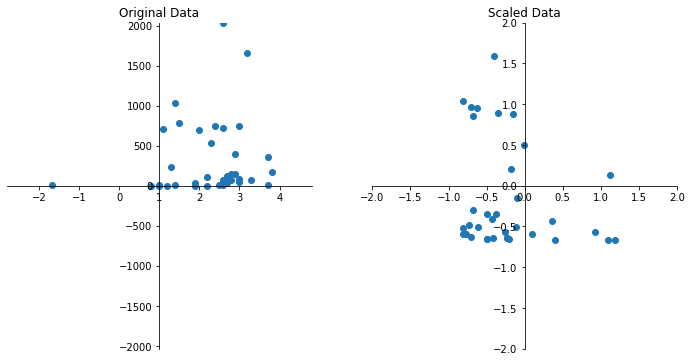

In [15]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["population_growth_annual_per"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["population_growth_annual_per"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [16]:
summodel = sm.OLS(y, X)
results = summodel.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.702
Model:                            OLS   Adj. R-squared (uncentered):              0.684
Method:                 Least Squares   F-statistic:                              38.47
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                    6.31e-13
Time:                        20:14:59   Log-Likelihood:                         -368.02
No. Observations:                  52   AIC:                                      742.0
Df Residuals:                      49   BIC:                                      747.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [17]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6915518947700421, R2: -0.2633783467426094


In [18]:
africa_data.columns

Index(['country_name', 'country_code', 'year', 'conflict_frequency_code',
       'conflict_deaths_code', 'population_density',
       'population_growth_annual_per', 'total_population',
       'refugee_pop_origin', 'rural_population', 'rural_population_per',
       'rural_population_growth', 'urban_population', 'urban_population_per',
       'urban_population_growth', 'corruption_control_estimate',
       'corruption_control_percentile', 'government _effectiveness_est',
       'government_effectiveness_percentile', 'stability_est',
       'stability_percentile', 'regulatory_est', 'regulatory_percentile',
       'ruleoflaw_est', 'ruleoflaw_percentile', 'accountability_est',
       'accountability_percentile ', 'ethnic_score', 'gdp_growth_per',
       'gdp_percap_per', 'mortality_rate', 'gdp_total', 'gdp_percap',
       'gni_total', 'fdi_inflows_gdp', 'fdi_inflows_total',
       'conflict_fatalities', 'conflict_events'],
      dtype='object')

In [19]:
africa_pop2=africa_data[['rural_population_growth', 'urban_population_growth', 'conflict_events']]



In [20]:
X=africa_pop2[['rural_population_growth', 'urban_population_growth']]
y=africa_pop2['conflict_events'].values.reshape(-1,1)
print(X.shape, y.shape)

(52, 2) (52, 1)


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,rural_population_growth,urban_population_growth
6,-0.2,1.9
34,2.1,4.4
4,2.0,5.0
37,0.9,4.2
24,1.7,4.1


In [23]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [24]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled)

[[-1.31004623 -1.39728525]
 [ 0.78161027  0.8387883 ]
 [ 0.69066868  1.37544595]
 [-0.30968877  0.65990242]
 [ 0.41784392  0.57045947]
 [-1.21910464 -1.21839937]
 [-1.31004623 -1.21839937]
 [ 1.60008455  2.44876126]
 [-0.05423286 -0.03226801]
 [ 1.41820138  0.39157359]
 [-0.40063036 -1.57617114]
 [ 0.41784392  1.28600301]
 [ 2.23667566  0.74934536]
 [-0.94627988 -1.03951349]
 [ 0.87255185  0.92823124]
 [-1.21910464 -0.59229877]
 [ 0.59972709  1.4648889 ]
 [-1.03722147 -1.4867282 ]
 [-0.21874719  0.8387883 ]
 [ 1.14537661 -0.32396995]
 [ 1.05443503  0.48101653]
 [ 0.69066868 -0.23452701]
 [ 0.05407757  0.74934536]
 [ 0.96349344  0.30213065]
 [ 0.41784392  0.39157359]
 [-2.12852051 -0.41341289]
 [-1.31004623  0.48101653]
 [ 0.32690233 -0.05564112]
 [-0.94627988 -1.66561408]
 [ 0.69066868 -0.50285583]
 [ 0.50878551  0.03380182]
 [-2.03757892 -0.41341289]
 [ 0.23596075 -1.93394291]
 [-0.49157195 -0.05564112]
 [ 0.05407757  0.21268771]
 [-1.12816306 -1.57617114]
 [ 0.59972709  0.74934536]
 

In [25]:
X_train_scaled[0]

array([-1.31004623, -1.39728525])

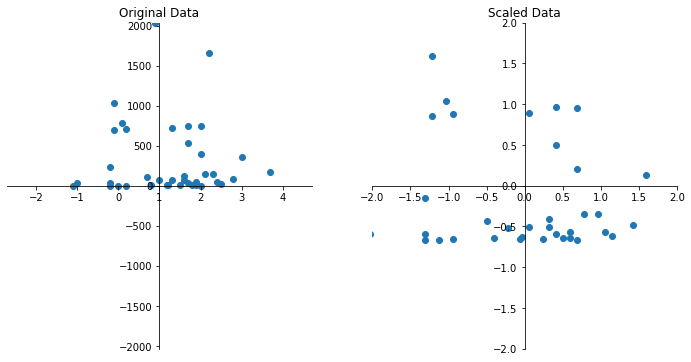

In [26]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train['rural_population_growth'].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train['rural_population_growth'], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [27]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 9163.976469287663, R2: -16740.432608187195


In [28]:
summodel = sm.OLS(y, X)
results = summodel.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.335
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              12.58
Date:                Tue, 01 Sep 2020   Prob (F-statistic):                    3.75e-05
Time:                        20:15:00   Log-Likelihood:                         -388.89
No. Observations:                  52   AIC:                                      781.8
Df Residuals:                      50   BIC:                                      785.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------